# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('base01.csv')
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0


In [17]:
df.mau = df['mau'].astype(int)

In [18]:
df.mau

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [19]:
X = df.drop('mau', axis=1)
y = df.mau

In [20]:
# separando traino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [21]:
clf = DecisionTreeClassifier(random_state = 123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_train)

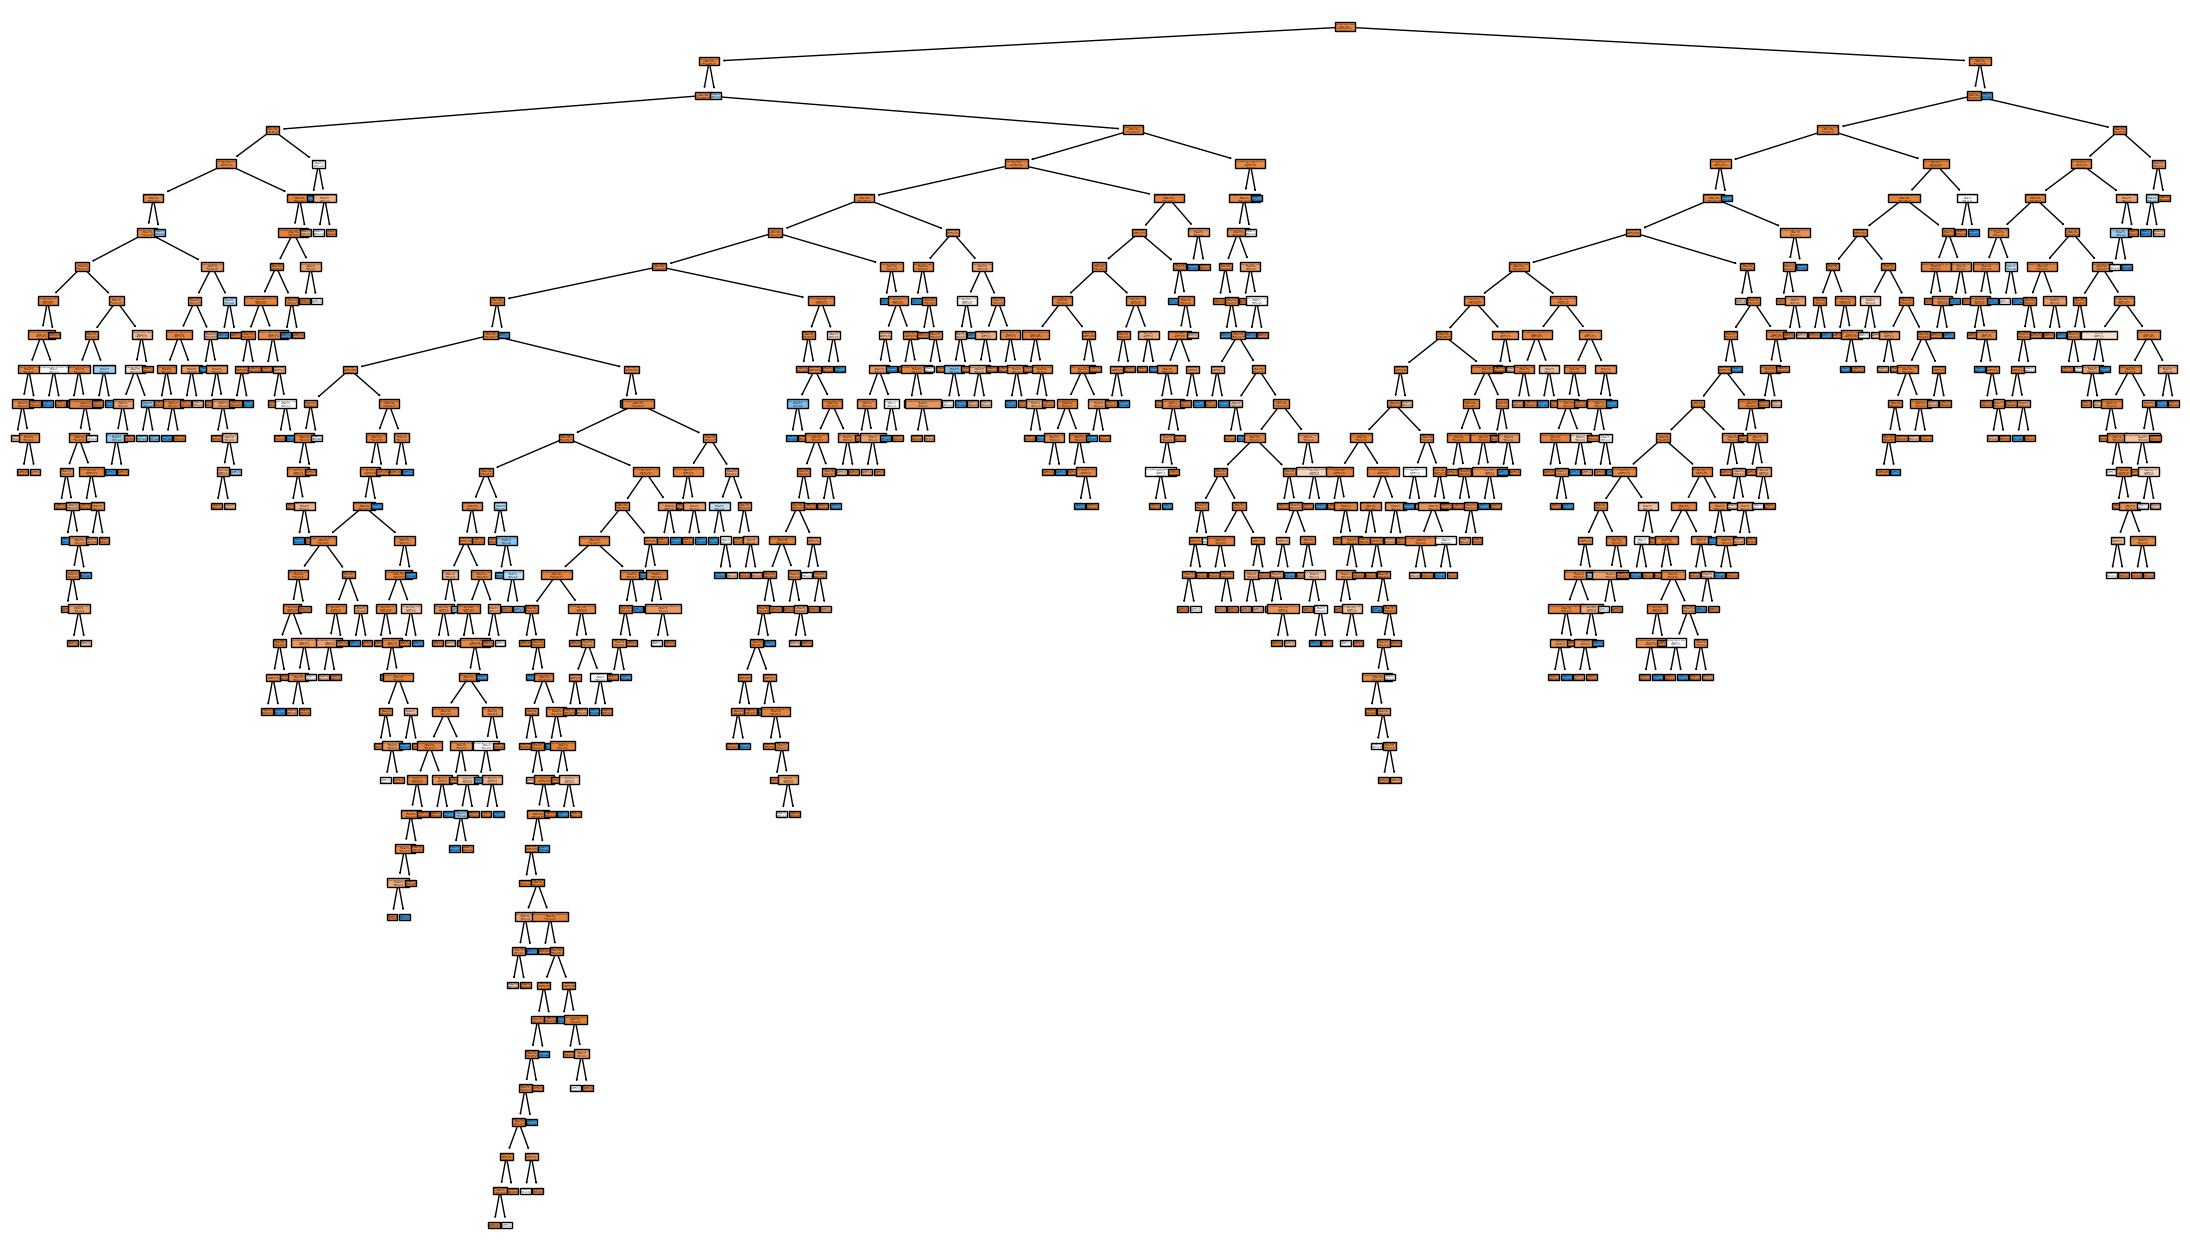

In [24]:
plt.figure(figsize = (28,16))
plot_tree(clf,
         filled = True,
         class_names = ['bom', 'mau'],
         feature_names = X.columns);

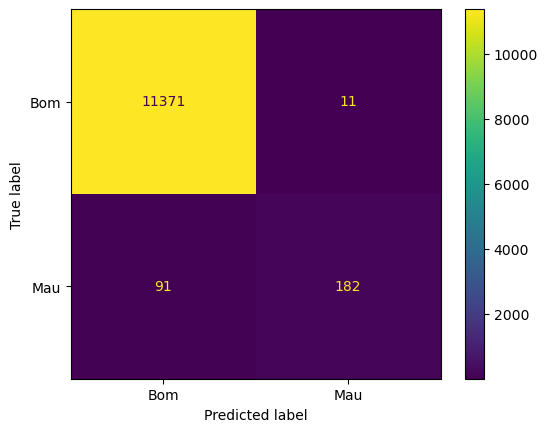

In [25]:
cm = confusion_matrix(y_train, predict)
disp = ConfusionMatrixDisplay(cm, display_labels = ['Bom', 'Mau'])
disp.plot()

In [27]:
accuracy_score(y_train, predict)

0.9912483912483913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [29]:
predict_teste = clf.predict(X_test)

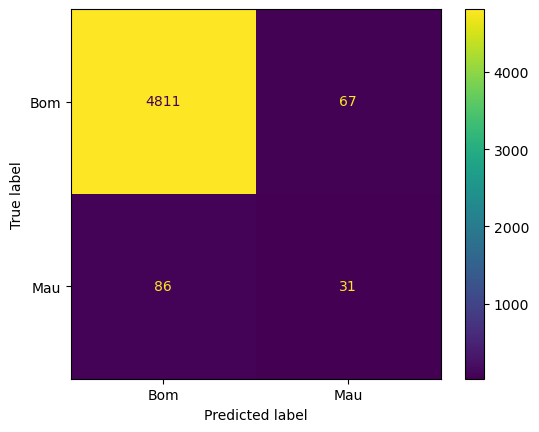

In [31]:
cm = confusion_matrix(y_test, predict_teste)
disp = ConfusionMatrixDisplay(cm, display_labels=['Bom', 'Mau'])
disp.plot();

In [32]:
accuracy_score(y_test, predict_teste)

0.9693693693693693

In [33]:
# arvore nova

clf = DecisionTreeClassifier(random_state = 123,min_samples_leaf=5, max_depth=10)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_train)

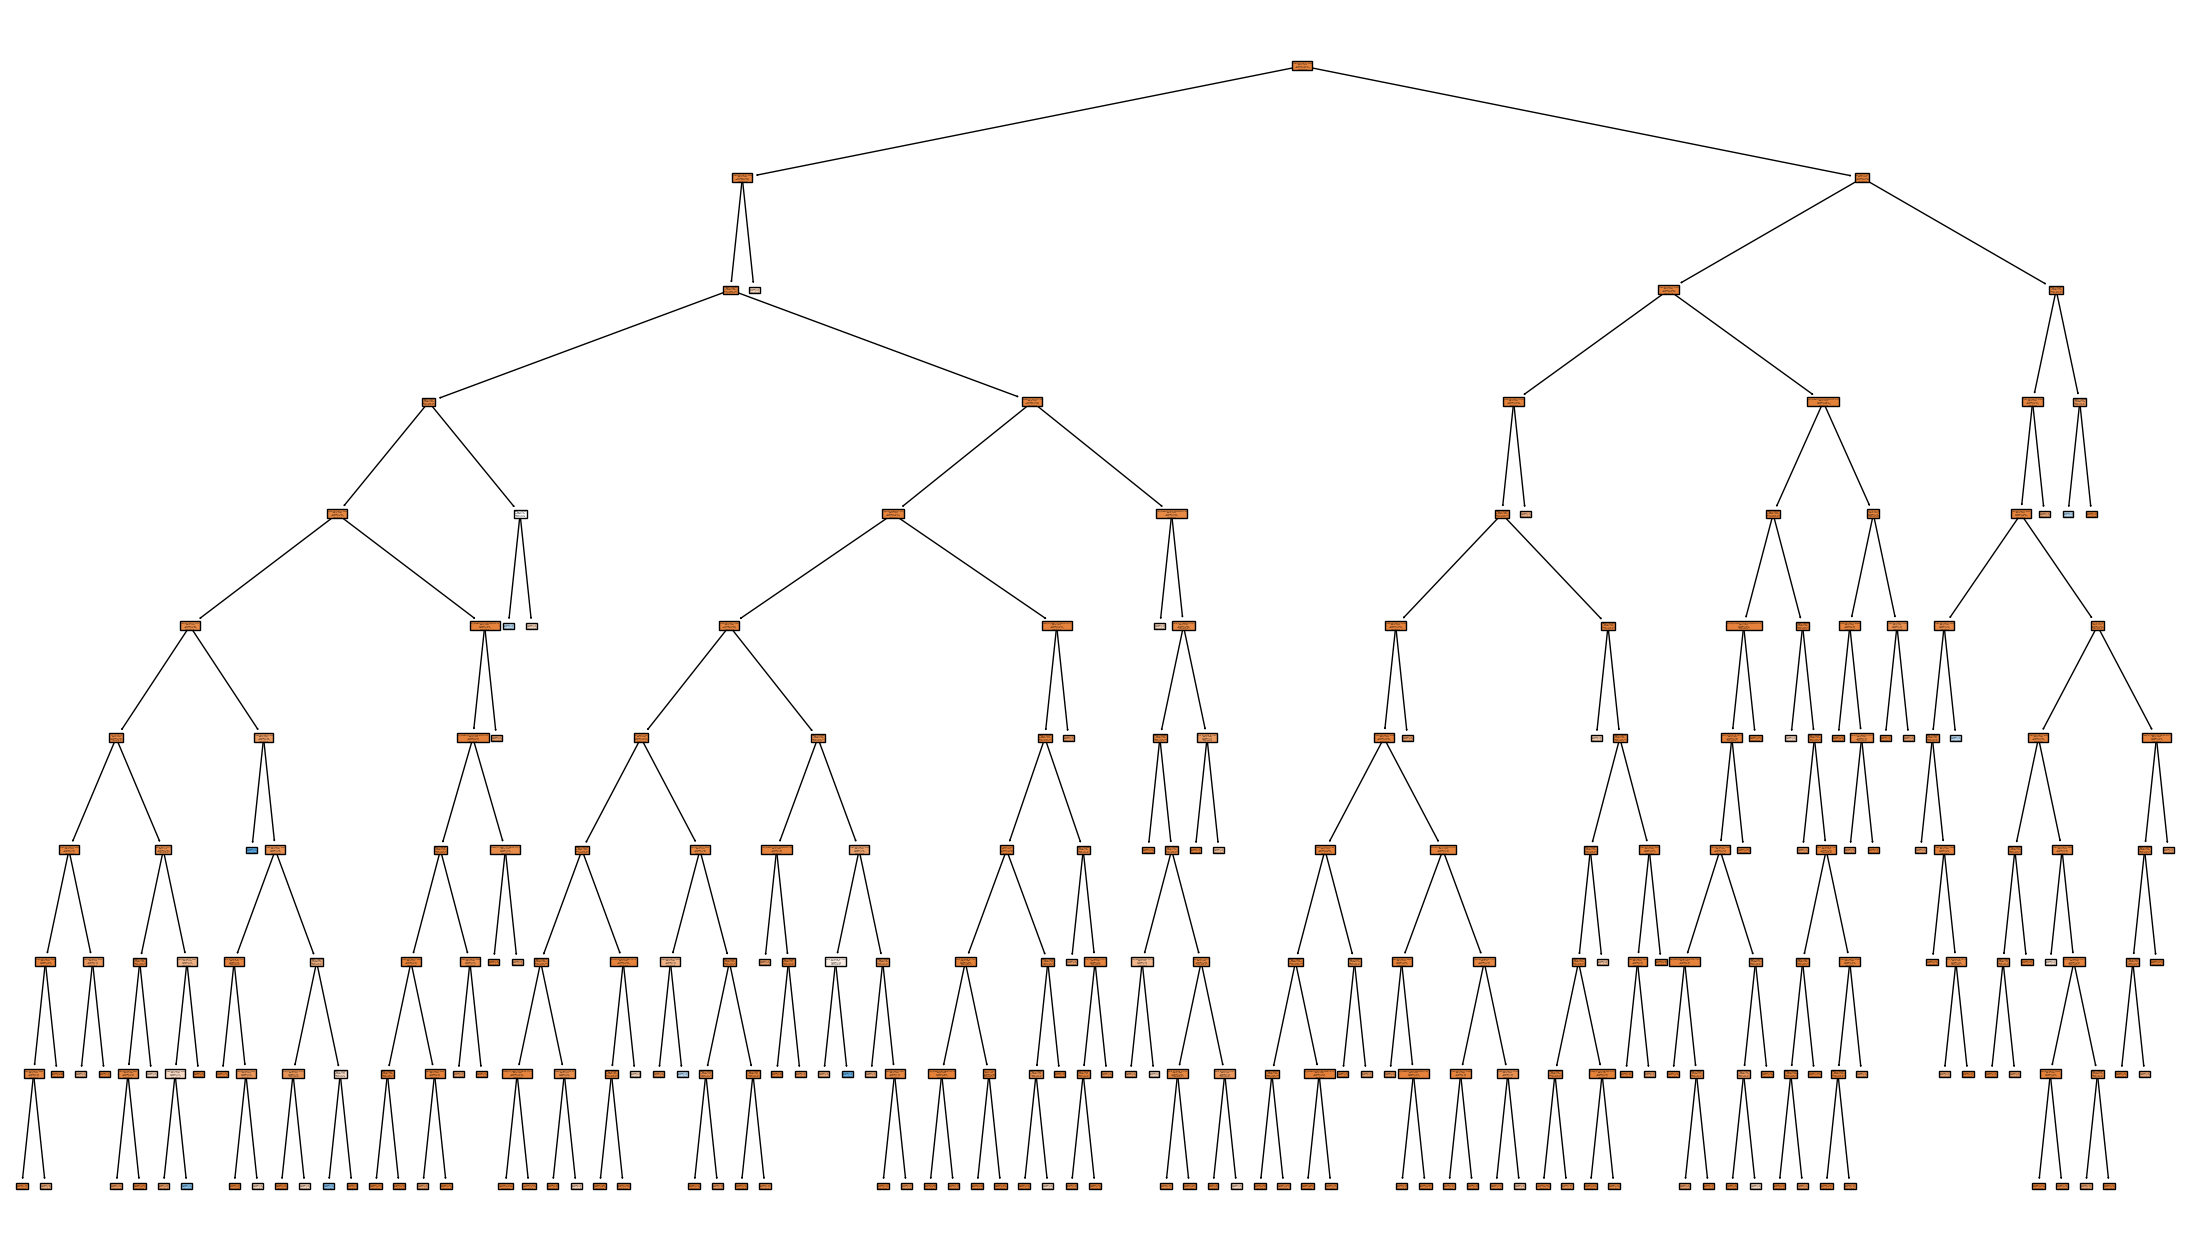

In [37]:
plt.figure(figsize = (28,16))
plot_tree(clf,
         filled = True,
         class_names = ['Bom', 'Mau'],
         feature_names = X.columns);

Nesta segunda árvore, quase todos foram classificados como bons, o que a meu ver deixa qualquer conclusão tomada a partir dela, extremamente duvidosa

In [38]:
accuracy_score(y_train, predict)

0.9781209781209781